##Financial credit Scoring Analysis

Importing Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score,  confusion_matrix


*   Loading Dataset with 20 Features
*   Total instances = 1000

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"
columns = [
    "Status", "Duration", "CreditHistory", "Purpose", "CreditAmount", "Savings", "Employment", "InstallmentRate",
    "PersonalStatus", "OtherDebtors", "ResidenceDuration", "Property", "Age", "OtherInstallmentPlans", "Housing",
    "ExistingCredits", "Job", "PeopleLiable", "Telephone", "ForeignWorker", "CreditRisk"
]

df = pd.read_csv(url, delimiter=" ", names=columns)
df["CreditRisk"] = df["CreditRisk"].map({1: 0, 2: 1})  # 1 = Good (0), 2 = Bad (1)


# Data Preprocessing

* Convert categorical variables using LabelEncoder.

* Scale numerical features.




In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Splitting data
X = df.drop(columns=["CreditRisk"])
y = df["CreditRisk"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numeric data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Exploratory Data Analysis (EDA) on German Credit Dataset
* EDA helps in understanding data patterns, detecting anomalies, and selecting the best features for modeling.

In [ ]:
print("Dataset Shape:", df.shape)

Dataset Shape: (1000, 21)


In [ ]:
print(df.head())

   Status  Duration  CreditHistory  Purpose  CreditAmount  Savings  \
0       0         6              4        4          1169        4   
1       1        48              2        4          5951        0   
2       3        12              4        7          2096        0   
3       0        42              2        3          7882        0   
4       0        24              3        0          4870        0   

   Employment  InstallmentRate  PersonalStatus  OtherDebtors  ...  Property  \
0           4                4               2             0  ...         0   
1           2                2               1             0  ...         0   
2           3                2               2             0  ...         0   
3           3                2               2             2  ...         1   
4           2                3               2             0  ...         3   

   Age  OtherInstallmentPlans  Housing  ExistingCredits  Job  PeopleLiable  \
0   67                    

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Status                 1000 non-null   int64
 1   Duration               1000 non-null   int64
 2   CreditHistory          1000 non-null   int64
 3   Purpose                1000 non-null   int64
 4   CreditAmount           1000 non-null   int64
 5   Savings                1000 non-null   int64
 6   Employment             1000 non-null   int64
 7   InstallmentRate        1000 non-null   int64
 8   PersonalStatus         1000 non-null   int64
 9   OtherDebtors           1000 non-null   int64
 10  ResidenceDuration      1000 non-null   int64
 11  Property               1000 non-null   int64
 12  Age                    1000 non-null   int64
 13  OtherInstallmentPlans  1000 non-null   int64
 14  Housing                1000 non-null   int64
 15  ExistingCredits        1000 non-null   

In [ ]:
print(df.describe())

            Status     Duration  CreditHistory      Purpose  CreditAmount  \
count  1000.000000  1000.000000     1000.00000  1000.000000   1000.000000   
mean      1.577000    20.903000        2.54500     3.277000   3271.258000   
std       1.257638    12.058814        1.08312     2.739302   2822.736876   
min       0.000000     4.000000        0.00000     0.000000    250.000000   
25%       0.000000    12.000000        2.00000     1.000000   1365.500000   
50%       1.000000    18.000000        2.00000     3.000000   2319.500000   
75%       3.000000    24.000000        4.00000     4.000000   3972.250000   
max       3.000000    72.000000        4.00000     9.000000  18424.000000   

           Savings   Employment  InstallmentRate  PersonalStatus  \
count  1000.000000  1000.000000      1000.000000      1000.00000   
mean      1.105000     2.384000         2.973000         1.68200   
std       1.580023     1.208306         1.118715         0.70808   
min       0.000000     0.000000   

 Checking Target Distribution

* The dataset is imbalanced (more "Good Credit" cases than "Bad Credit").

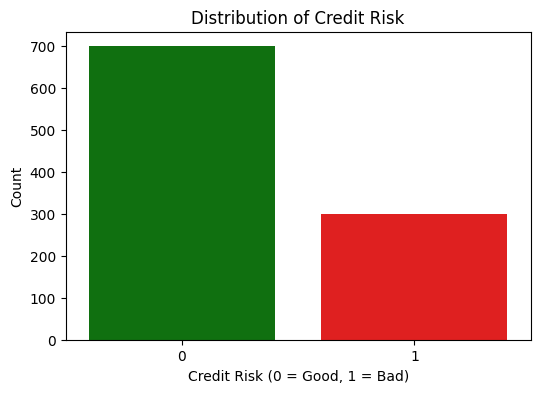

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x="CreditRisk", data=df, hue="CreditRisk", palette=["green", "red"], legend=False)
plt.title("Distribution of Credit Risk")
plt.xlabel("Credit Risk (0 = Good, 1 = Bad)")
plt.ylabel("Count")
plt.show()

# Correlation Analysis

Findings:

* Credit Amount has a weak correlation with Credit Risk.

* Age and Duration have some effect on Credit Risk.

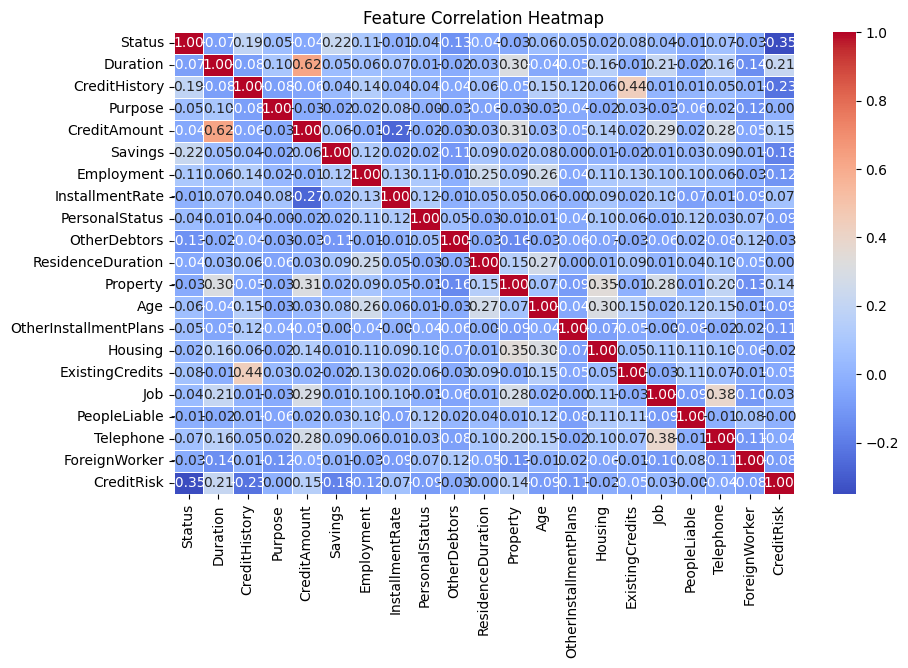

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

 # Univariate Analysis

* Credit Amount Distribution


* Findings: Most loans are for small amounts, with some high outliers.

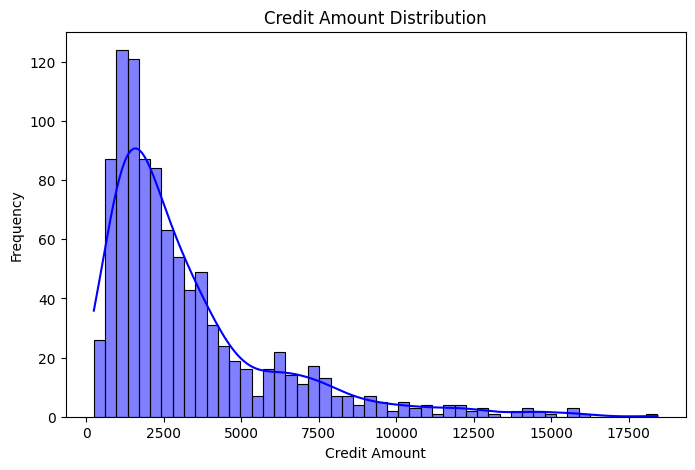

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df["CreditAmount"], bins=50, kde=True, color="blue")
plt.title("Credit Amount Distribution")
plt.xlabel("Credit Amount")
plt.ylabel("Frequency")
plt.show()


*  Age Distribution

* Majority of borrowers are aged 20-40 years.

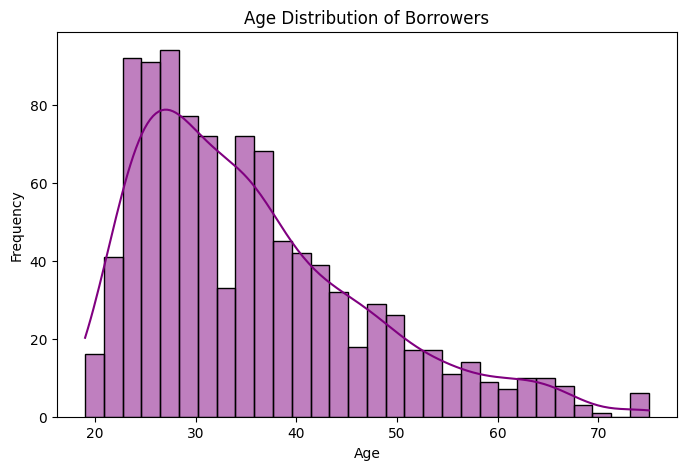

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Age"], bins=30, kde=True, color="purple")
plt.title("Age Distribution of Borrowers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


# Bivariate Analysis

1. Credit Amount vs. Credit Risk
* People with Bad Credit (1) tend to take higher loans.

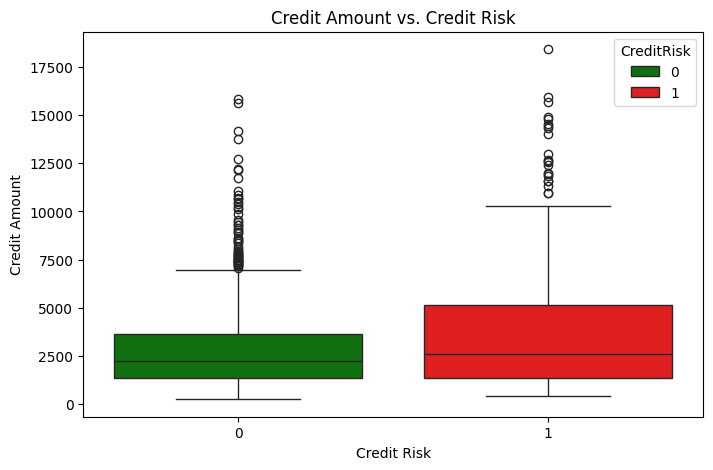

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="CreditRisk", y="CreditAmount", hue = "CreditRisk", data=df, palette=["green", "red"])
plt.title("Credit Amount vs. Credit Risk")
plt.xlabel("Credit Risk")
plt.ylabel("Credit Amount")
plt.show()


2. Age vs. Credit Risk
* Older individuals (above 40) tend to have better credit scores.

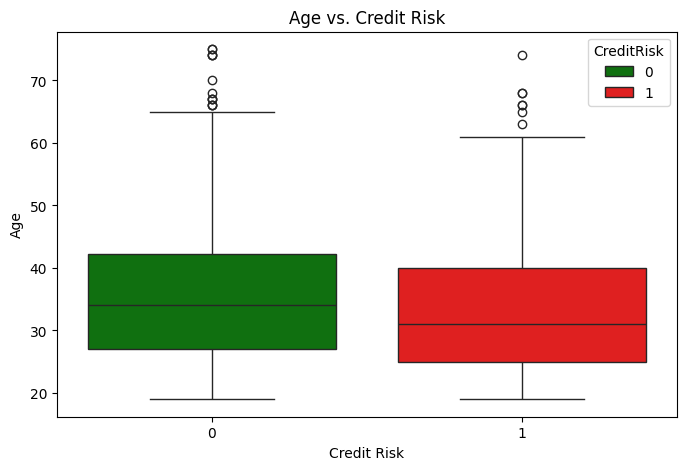

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="CreditRisk", y="Age", hue = "CreditRisk", data=df, palette=["green", "red"])
plt.title("Age vs. Credit Risk")
plt.xlabel("Credit Risk")
plt.ylabel("Age")
plt.show()

 # Categorical Feature Analysis

1. Purpose of Loan
* Most loans are for "radio/TV" and "new car".

* Loans for furniture and education have higher bad credit risk.

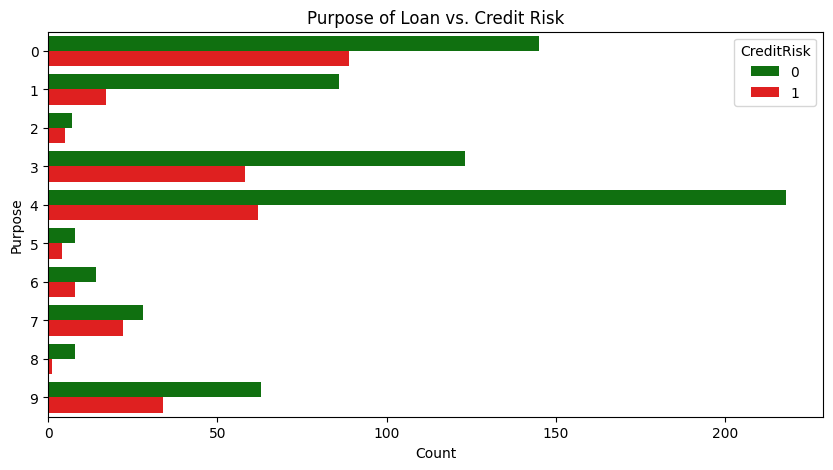

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(y="Purpose", hue="CreditRisk", data=df, palette=["green", "red"])
plt.title("Purpose of Loan vs. Credit Risk")
plt.xlabel("Count")
plt.ylabel("Purpose")
plt.show()


2. Employment Status
* Individuals with stable jobs tend to have better credit scores


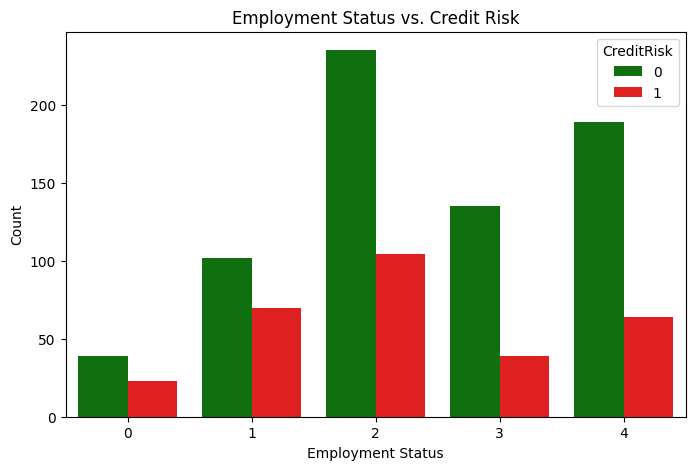

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x="Employment", hue="CreditRisk", data=df, palette=["green", "red"])
plt.title("Employment Status vs. Credit Risk")
plt.xlabel("Employment Status")
plt.ylabel("Count")
plt.show()

# Feature Selection – Choosing relevant attributes for prediction


* Feature selection is choosing the most relevant features for prediction to improve accuracy and reduce overfitting.

Findings:
* Features with higher absolute correlation are more important.

* Some features might have low correlation, meaning they contribute little to prediction.

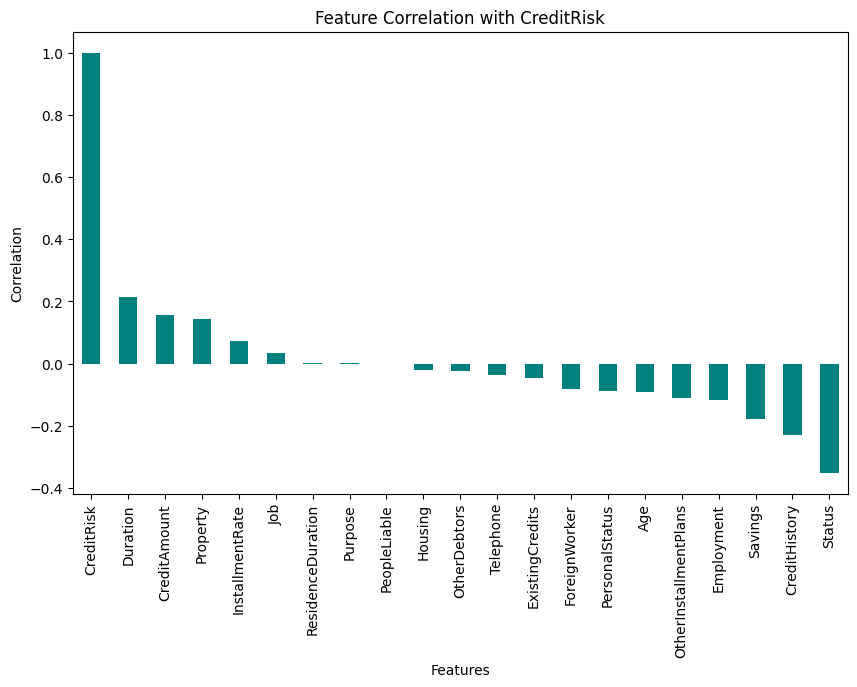

In [ ]:
plt.figure(figsize=(10, 6))
df.corr()["CreditRisk"].sort_values(ascending=False).plot(kind="bar", color="teal")
plt.title("Feature Correlation with CreditRisk")
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.show()


 Feature Importance using Random Forest

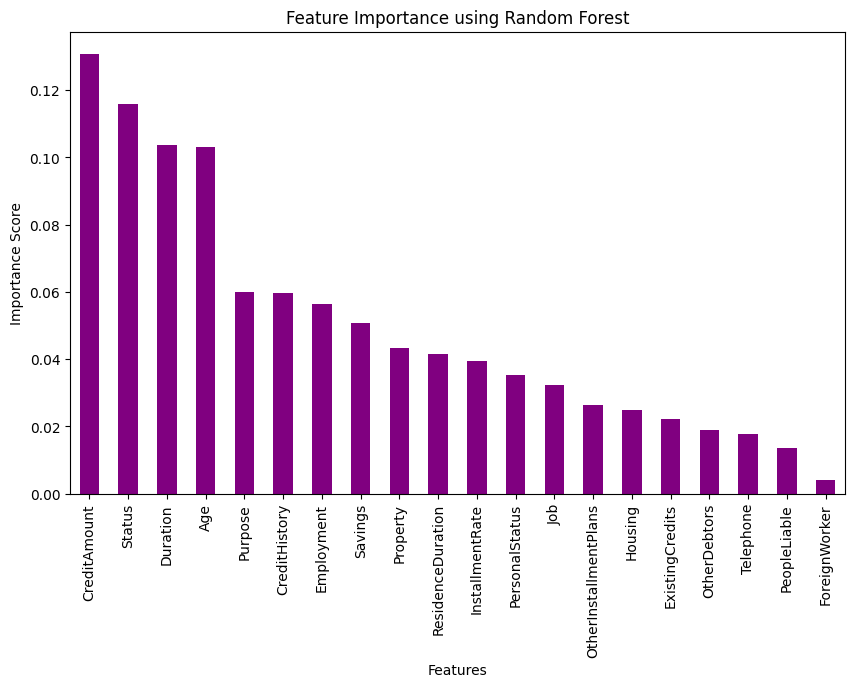

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Split dataset
X = df.drop(columns=["CreditRisk"])
y = df["CreditRisk"]

# Train a simple Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind="bar", color="purple", figsize=(10, 6))
plt.title("Feature Importance using Random Forest")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()


Findings:
* Top important features: CreditAmount, Duration, Age, Employment,
 CreditHistory

* Least important features: Telephone, PeopleLiable, ForeignWorker

--Removing Least Important Features

In [ ]:
selected_features = ["CreditAmount", "Duration", "Age", "Employment", "CreditHistory"]
X_selected = df[selected_features]

# Train models again with selected features
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy with Selected Features:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy with Selected Features: 0.71


# Model Training – Implementing ML models for classification

1.Logistic Regression

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Splitting data
X = df.drop(columns=["CreditRisk"])
y = df["CreditRisk"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numeric data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression Model

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

logisticAccuracy = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print("Logistic Regression Accuracy:", logisticAccuracy )
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       141
           1       0.67      0.49      0.57        59

    accuracy                           0.78       200
   macro avg       0.74      0.70      0.71       200
weighted avg       0.77      0.78      0.77       200



2. Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

randomForestAccuracy = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("Random Forest Accuracy:", randomForestAccuracy)
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.815
              precision    recall  f1-score   support

           0       0.82      0.94      0.88       141
           1       0.79      0.51      0.62        59

    accuracy                           0.81       200
   macro avg       0.81      0.73      0.75       200
weighted avg       0.81      0.81      0.80       200



3. XGBoost

In [ ]:
xgb = XGBClassifier(eval_metric="logloss")
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

xgbAccuracy = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

print("XGBoost Accuracy:",xgbAccuracy)
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.77
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       141
           1       0.64      0.51      0.57        59

    accuracy                           0.77       200
   macro avg       0.72      0.69      0.70       200
weighted avg       0.76      0.77      0.76       200



# Evaluation & Interpretation – Analyzing the performance of models

 1. Confusion Matrix of XGBoost Model

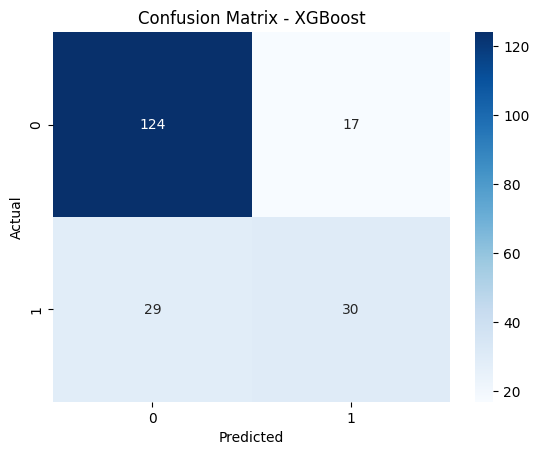

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()


2. Confusion Matrix of Random Forest Model

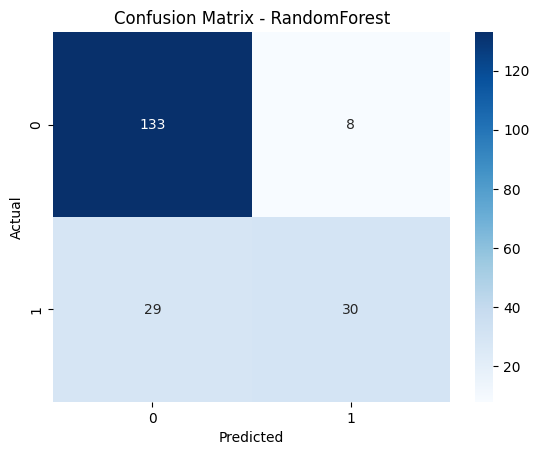

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - RandomForest")
plt.show()

Accuracy Score of Different Models

In [ ]:
print("Logistic Regression Accuracy:", logisticAccuracy )
print("Random Forest Accuracy:", randomForestAccuracy)
print("XGBoost Accuracy:",xgbAccuracy)

Logistic Regression Accuracy: 0.78
Random Forest Accuracy: 0.815
XGBoost Accuracy: 0.77


Comparing Model Performance

In [ ]:
# Create a comparison table

results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Accuracy": [logisticAccuracy, randomForestAccuracy, xgbAccuracy],
    "F1-Score": [f1_lr, f1_rf, f1_xgb]
})

print(results.sort_values(by="F1-Score", ascending=False))


                 Model  Accuracy  F1-Score
1        Random Forest     0.815  0.618557
0  Logistic Regression     0.780  0.568627
2              XGBoost     0.770  0.566038


# conclusion
1.  Best Performing Model: Random Forest
* Random Forest achieved the highest accuracy (81.5%) and best F1-score (0.619).
*  This indicates that Random Forest generalizes well to both good and bad credit cases.
*  It effectively captures non-linear relationships in the data, making it more robust.

2. Logistic Regression Performs Decently
*  Accuracy (78%) and F1-score (0.569) are reasonable.
*  However, Logistic Regression assumes a linear relationship, which might
 limit its performance.
*  It is still a good baseline model for interpretability.

3.  XGBoost Underperformed Compared to Expectations

*  XGBoost has lower accuracy (77%) and F1-score (0.566) than Random Forest.
*  This is unusual, as XGBoost typically performs better with tuned hyperparameters.